In [1]:
!ls ../pickles/

avg_AO_counterfactual_representation.pickle
avg_class_level_AO_counterfactual_representation.pickle
avg_class_level_I_counterfactual_representation.pickle
avg_class_level_K_counterfactual_representation.pickle
avg_class_level_O_counterfactual_representation.pickle
avg_class_level_Q_counterfactual_representation.pickle
avg_class_level_V_counterfactual_representation.pickle
avg_I_counterfactual_representation.pickle
avg_K_counterfactual_representation.pickle
avg_O_counterfactual_representation.pickle
avg_Q_counterfactual_representation.pickle
avg_V_counterfactual_representation.pickle
class_level_nie_300_samples.pickle
distributions
individual_class_level
individual_class_level_AO_counterfactual_representation.pickle
individual_class_level_I_High-overlap_contradiction_counterfactual_representation.pickle
individual_class_level_I_High-overlap_entailment_counterfactual_representation.pickle
individual_class_level_I_High-overlap_neutral_counterfactual_representation.pickle
individual_class_

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import torch
import pickle
import numpy as np
from collections import Counter

/tmp/ipykernel_446008/4137023273.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:

with open(f'../pickles/distribution.pickle', 'rb') as handle:
    # get [CLS] activation 
    distributions = pickle.load(handle)
    label_collectors = pickle.load(handle)
    

FileNotFoundError: [Errno 2] No such file or directory: '../pickles/distribution.pickle'

In [4]:
distributions['NIE']

[tensor([9.9178e-01, 3.1267e-04, 7.9033e-03]),
 tensor([9.9399e-01, 2.6481e-04, 5.7491e-03]),
 tensor([9.9791e-01, 2.1820e-04, 1.8765e-03]),
 tensor([0.9364, 0.0013, 0.0623]),
 tensor([0.5637, 0.0278, 0.4086]),
 tensor([9.9797e-01, 2.4121e-04, 1.7926e-03]),
 tensor([0.0214, 0.0090, 0.9696]),
 tensor([9.9885e-01, 3.7904e-04, 7.7081e-04]),
 tensor([9.9831e-01, 5.5223e-04, 1.1418e-03]),
 tensor([9.9825e-01, 3.8202e-04, 1.3702e-03]),
 tensor([9.9739e-01, 5.7561e-04, 2.0388e-03]),
 tensor([0.9037, 0.0023, 0.0939]),
 tensor([0.4762, 0.0203, 0.5035]),
 tensor([9.9855e-01, 2.4775e-04, 1.1976e-03]),
 tensor([9.9729e-01, 1.5682e-04, 2.5543e-03]),
 tensor([0.3359, 0.2051, 0.4590]),
 tensor([0.9833, 0.0011, 0.0156]),
 tensor([0.9892, 0.0015, 0.0093]),
 tensor([0.4030, 0.0044, 0.5925]),
 tensor([9.9888e-01, 2.8972e-04, 8.3113e-04]),
 tensor([0.9230, 0.0229, 0.0541]),
 tensor([0.9799, 0.0090, 0.0111]),
 tensor([9.9850e-01, 5.7885e-04, 9.1821e-04]),
 tensor([9.9774e-01, 5.0940e-04, 1.7471e-03]),
 ten

In [5]:
label_maps = {"contradiction": 0 , "entailment" : 1, "neutral": 2}

In [6]:
# Todo: get distribution of neurons

for mode in distributions.keys():
    print(f"{mode} : {len(distributions[mode])}")
    distributions[mode] = torch.stack(tuple(distributions[mode]), dim = 0)
    print(distributions[mode].shape)
    print(len(label_collectors[mode]))

NIE : 3000
torch.Size([3000, 3])
3000
High-overlap : 1050
torch.Size([1050, 3])
1050
Low-overlap : 1050
torch.Size([1050, 3])
1050


In [7]:
set(label_collectors[mode])

{'contradiction', 'entailment', 'neutral'}

In [8]:
acc = {}
class_acc = {}
confident = {}

for do in distributions.keys():
    
    acc[do] = []
    class_acc[do] = {}
    confident[do] = {}
    
    for dist, label in zip(distributions[do],label_collectors[do]):
        
        if '-' in label:
            continue
        
        if label not in class_acc[do].keys():
            
            class_acc[do][label] = []
            confident[do][label] = 0
            
        prediction = torch.argmax(dist)
        acc[do].append(prediction == label_maps[label])
        confident[do][label] += dist[label_maps[label]]
        class_acc[do][label].append(prediction == label_maps[label])
        
    print(f"=============================  {do}  ============================")  
    print(f"Overall accuray : {sum(acc[do]) / len(acc[do])}")
    print(f"entail acc: {sum(class_acc[do]['entailment']) / len(class_acc[do]['entailment'])} ")   
    print(f"contradiction acc: {sum(class_acc[do]['contradiction']) / len(class_acc[do]['contradiction'])} ")
    print(f"neutral acc: {sum(class_acc[do]['neutral']) / len(class_acc[do]['neutral'])} ")
    print(f"******* expected distribution of golden answers ************")
    print(f"entail confident: {confident[do]['entailment'] / len(class_acc[do]['entailment'])} ")   
    print(f"contradiction confident: {confident[do]['contradiction'] / len(class_acc[do]['contradiction'])} ")
    print(f"neutral confident: {confident[do]['neutral']   / len(class_acc[do]['neutral'])}")
    
    print(f"Total samples of each class : {Counter(label_collectors[do])}")

=============================  NIE  ============================
Overall accuray : 0.8523333072662354
entail acc: 0.8429999947547913 
contradiction acc: 0.8809999823570251 
neutral acc: 0.8330000042915344 
******* expected distribution of golden answers ************
entail confident: 0.8154234886169434 
contradiction confident: 0.8687571287155151 
neutral confident: 0.8092179298400879
Total samples of each class : Counter({'contradiction': 1000, 'entailment': 1000, 'neutral': 1000})
=============================  High-overlap  ============================
Overall accuray : 0.8723809719085693
entail acc: 0.9171428680419922 
contradiction acc: 0.8714285492897034 
neutral acc: 0.8285714387893677 
******* expected distribution of golden answers ************
entail confident: 0.9026926159858704 
contradiction confident: 0.8410233855247498 
neutral confident: 0.789136528968811
Total samples of each class : Counter({'contradiction': 350, 'entailment': 350, 'neutral': 350})
===================

In [ ]:
# compute average distribution of golden answers



In [75]:

top_neurons = {}
top_k = {}
x_layer = {}
y_nie = {}

layers = [*range(0, 12, 1)]
heads = [*range(0, 12, 1)]

for do in ['High-overlap','Low-overlap']:
    
    top_neurons[do] = {}
    
    for layer in layers:

        path = f'../pickles/top_neuron_{do}_{layer}.pickle'

        with open(path, 'rb') as handle:
            # get [CLS] activation 
            top_neuron = pickle.load(handle)
            print(top_neuron)
        
        top_neuron = {f'{layer}-{k}':v for k, v in top_neuron.items()}
        top_neurons[do].update(top_neuron)
        
    
    x_layer[do] = [k.split("-")[0] for k, v in top_neurons[do].items()]
    y_nie[do] = [float(v) for k, v in top_neurons[do].items()]  

{'I-1907': tensor(2.5483e-05), 'I-2166': tensor(1.4808e-05), 'I-2270': tensor(9.0370e-06), 'I-2236': tensor(7.5746e-06), 'I-566': tensor(5.0656e-06)}
{'V-384': tensor(1.0557e-05), 'I-123': tensor(7.7422e-06), 'I-2279': tensor(4.4789e-06), 'O-682': tensor(4.3698e-06), 'AO-31': tensor(4.2399e-06)}
{'I-10': tensor(1.2559e-05), 'O-353': tensor(6.3416e-06), 'AO-353': tensor(5.8934e-06), 'I-960': tensor(5.3615e-06), 'I-2930': tensor(4.8483e-06)}
{'I-617': tensor(1.3280e-05), 'AO-47': tensor(1.1256e-05), 'O-741': tensor(8.8444e-06), 'O-47': tensor(8.5033e-06), 'O-174': tensor(8.4336e-06)}
{'I-2720': tensor(4.5562e-05), 'O-47': tensor(1.9064e-05), 'O-640': tensor(1.8853e-05), 'I-2192': tensor(1.8299e-05), 'I-384': tensor(1.4575e-05)}
{'I-49': tensor(7.0635e-05), 'I-2064': tensor(5.8675e-05), 'I-1467': tensor(5.2298e-05), 'O-684': tensor(5.1692e-05), 'O-1': tensor(4.1904e-05)}
{'O-684': tensor(7.2111e-05), 'I-1716': tensor(6.1440e-05), 'I-1097': tensor(5.9441e-05), 'AO-684': tensor(5.6341e-05),

In [76]:
import pandas as pd 


layer_data = []
nie = []
treatment = ['High overlap scores','Low overlap scores']
treatments = []

for idx, do in enumerate(['High-overlap','Low-overlap']):    
    layer_data.extend(x_layer[do]) 
    nie.extend(y_nie[do])
    print(idx)
    treatments.extend([treatment[idx]] * len(x_layer[do]))
 

0
1


In [ ]:
treatments

In [77]:
d = {'Layer index': layer_data,
     'Indirect effects of top neurons':  nie,
     'Treatment': treatments}

df = pd.DataFrame(data=d)


In [78]:
df.tail()

,Layer index,Indirect effects of top neurons,Treatment
115,11,0.001953,Low overlap scores
116,11,0.000393,Low overlap scores
117,11,0.000290,Low overlap scores
118,11,0.000259,Low overlap scores
119,11,0.000249,Low overlap scores


[Text(0.5, 1.0, 'BERT-base')]

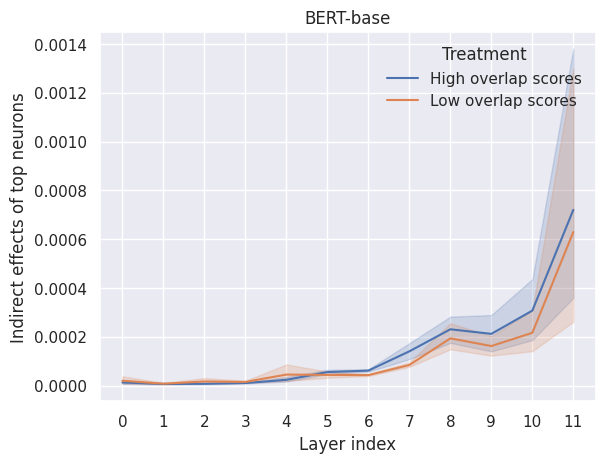

In [79]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(data=df, x="Layer index", y='Indirect effects of top neurons',hue="Treatment").set(title='BERT-base')
# sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event")